In [50]:
# ✅ Tallaabada 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models & tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


# **Dataset**

In [51]:
# Upload your file
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load the CSV (replace with your filename if different)
df = pd.read_csv("/content/ford.csv")

# i. Check shape
print(f"🔹 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

# ii. Preview Data
print("\n🔹 Head:")
display(df.head())

print("\n🔹 Tail:")
display(df.tail())

print("\n🔹 Info:")
df.info()


Saving ford.csv to ford.csv
🔹 Dataset Shape: 17965 rows, 9 columns

🔹 Head:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0



🔹 Tail:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2



🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


# **Step 2: Exploratory Data Analysis (EDA)**

In [52]:
# Check data types
print("🔸 Data Types and Structure:")
display(df.dtypes)


🔸 Data Types and Structure:


,0
model,object
year,int64
price,int64
transmission,object
mileage,int64
fuelType,object
tax,int64
mpg,float64
engineSize,float64


In [53]:
# c. Identify Data Types (numerical, categorical, text, datetime)
numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
datetime_cols = df.select_dtypes(include='datetime').columns.tolist()

print(f"🔹 Numerical: {numerical_cols}")
print(f"🔹 Categorical: {categorical_cols}")
print(f"🔹 Datetime: {datetime_cols}")


🔹 Numerical: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
🔹 Categorical: ['model', 'transmission', 'fuelType']
🔹 Datetime: []


In [54]:
#Descriptive Statistics
import numpy as np

# i. Numerical stats
print("🔸 Descriptive Statistics for Numerical Features:")
display(df[numerical_cols].describe())

# Extra metrics
for col in numerical_cols:
    print(f"\n📊 {col}:")
    print(f"Mean = {df[col].mean():.2f}")
    print(f"Median = {df[col].median():.2f}")
    print(f"Mode = {df[col].mode()[0]}")
    print(f"Std = {df[col].std():.2f}")
    print(f"Min = {df[col].min()}, Max = {df[col].max()}")
    print(f"Skewness = {df[col].skew():.2f}")
    print(f"Kurtosis = {df[col].kurt():.2f}")


🔸 Descriptive Statistics for Numerical Features:


,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000



📊 year:
Mean = 2016.87
Median = 2017.00
Mode = 2017
Std = 2.05
Min = 1996, Max = 2060
Skewness = -1.28
Kurtosis = 17.04

📊 price:
Mean = 12279.76
Median = 11291.00
Mode = 10000
Std = 4741.38
Min = 495, Max = 54995
Skewness = 1.10
Kurtosis = 3.26

📊 mileage:
Mean = 23363.63
Median = 18243.00
Mode = 10
Std = 19472.11
Min = 1, Max = 177644
Skewness = 1.84
Kurtosis = 5.00

📊 tax:
Mean = 113.33
Median = 145.00
Mode = 145
Std = 62.01
Min = 0, Max = 580
Skewness = -0.56
Kurtosis = 1.31

📊 mpg:
Mean = 57.91
Median = 58.90
Mode = 65.7
Std = 10.13
Min = 20.8, Max = 201.8
Skewness = 0.60
Kurtosis = 11.44

📊 engineSize:
Mean = 1.35
Median = 1.20
Mode = 1.0
Std = 0.43
Min = 0.0, Max = 5.0
Skewness = 1.89
Kurtosis = 11.29


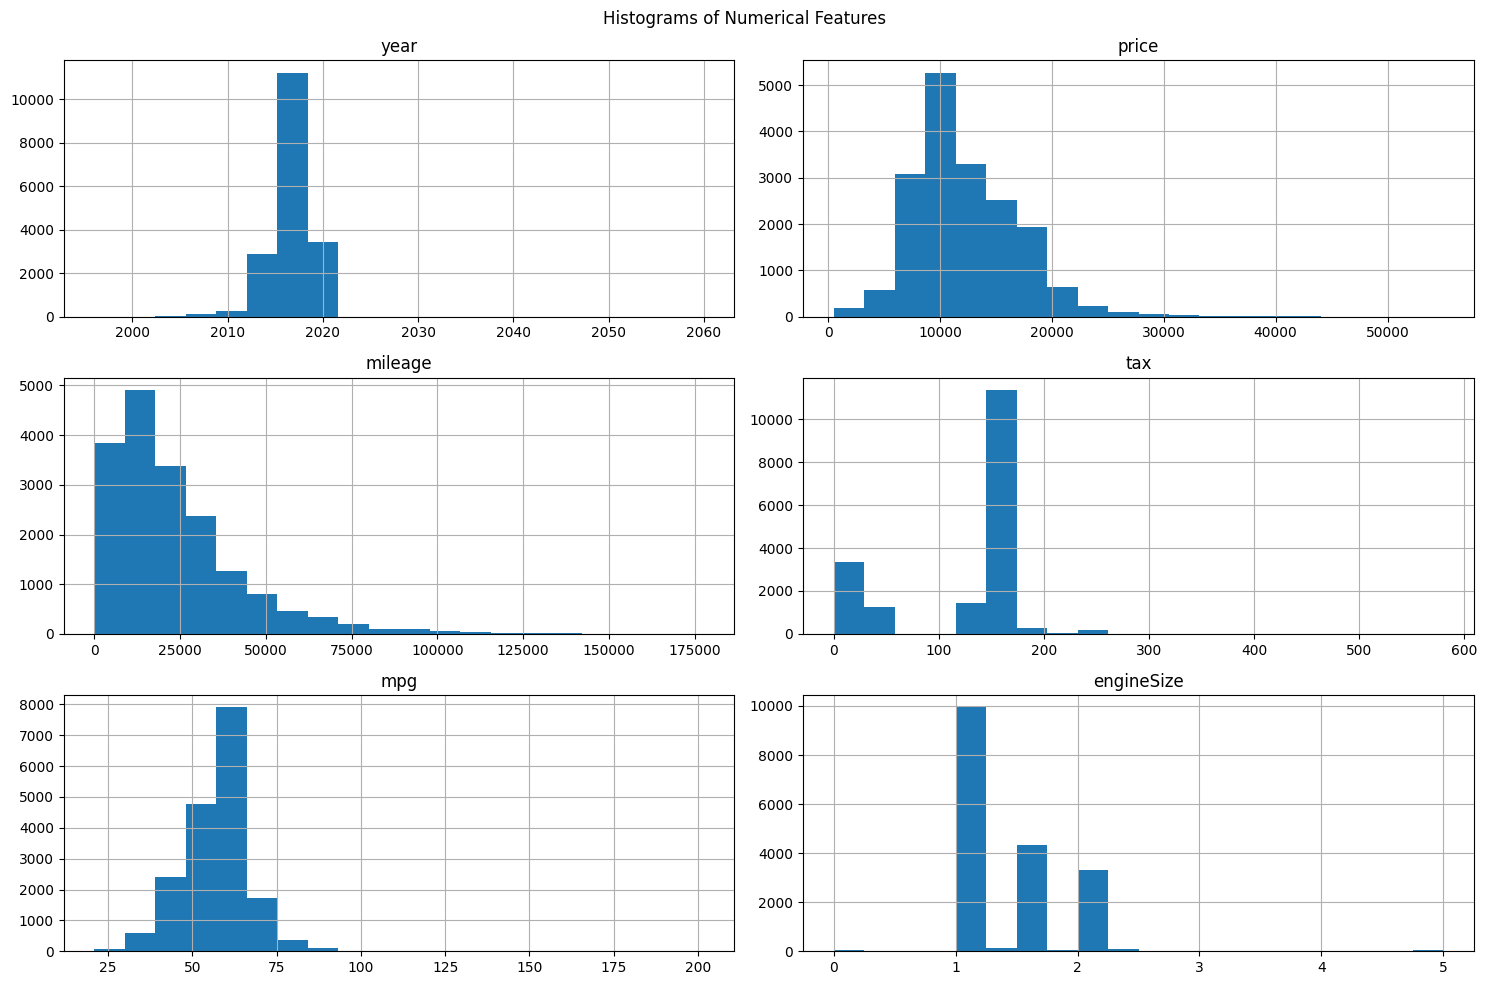

In [55]:
 #Data Distribution Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# i. Histograms
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()


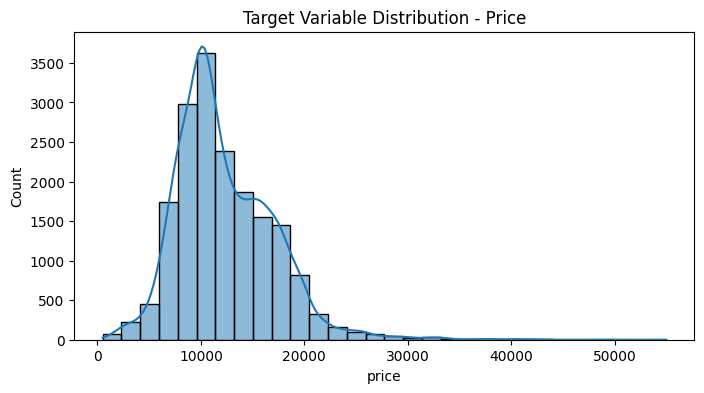

In [56]:
#Target Variable Analysis
# i. Distribution of the target variable
if 'price' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['price'], bins=30, kde=True)
    plt.title("Target Variable Distribution - Price")
    plt.show()


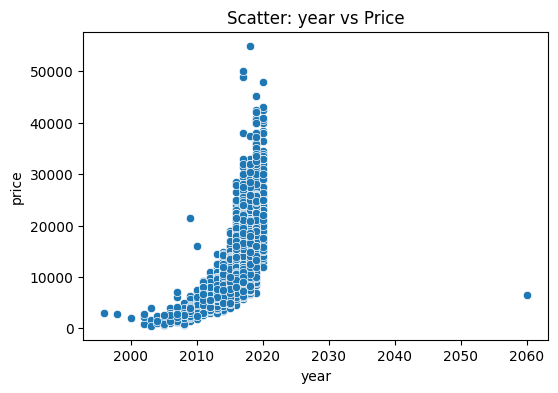

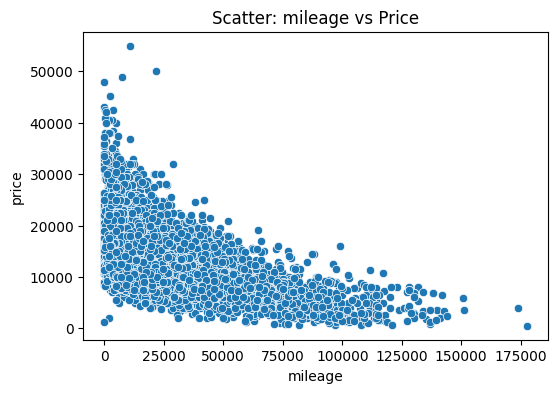

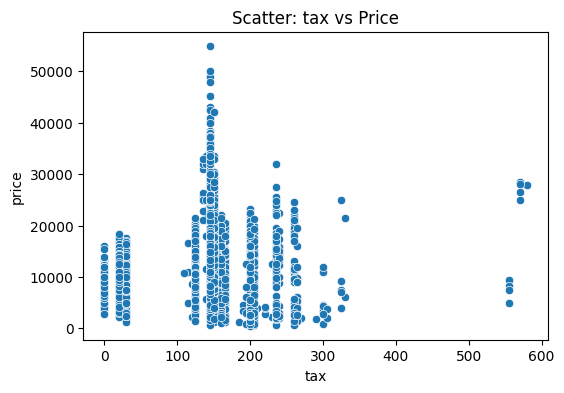

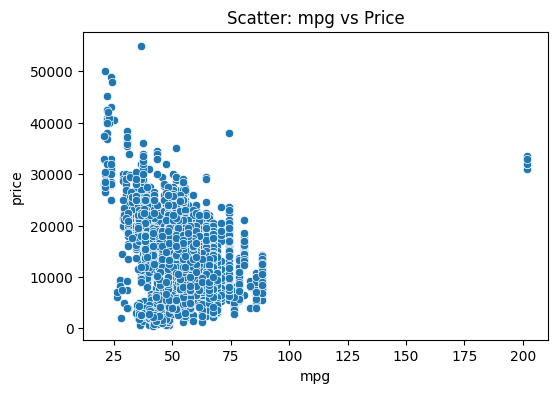

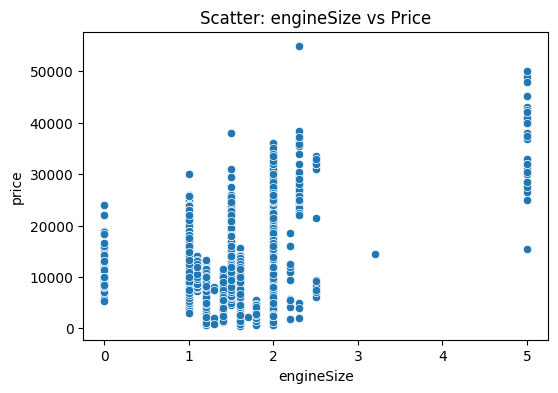

In [57]:
# ii. Relationship with features
for col in numerical_cols:
    if col != 'price':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f"Scatter: {col} vs Price")
        plt.show()


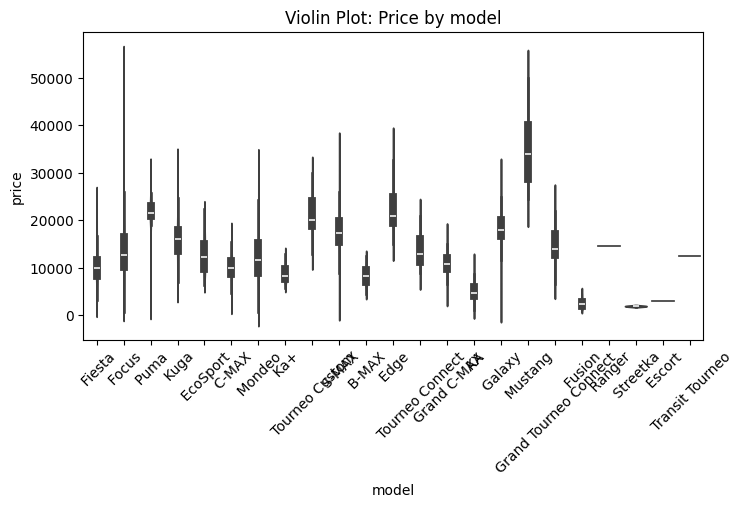

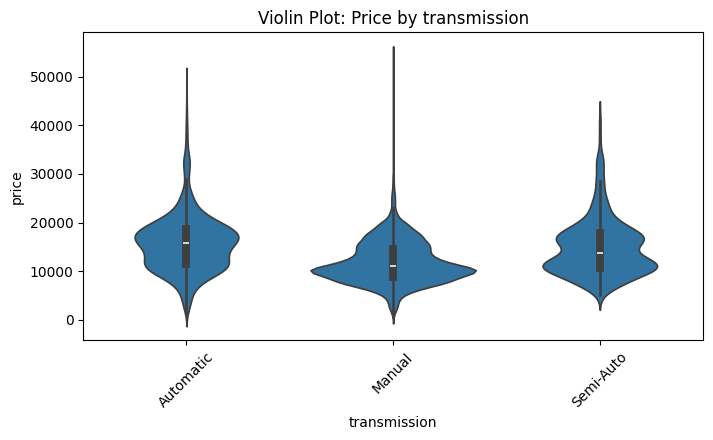

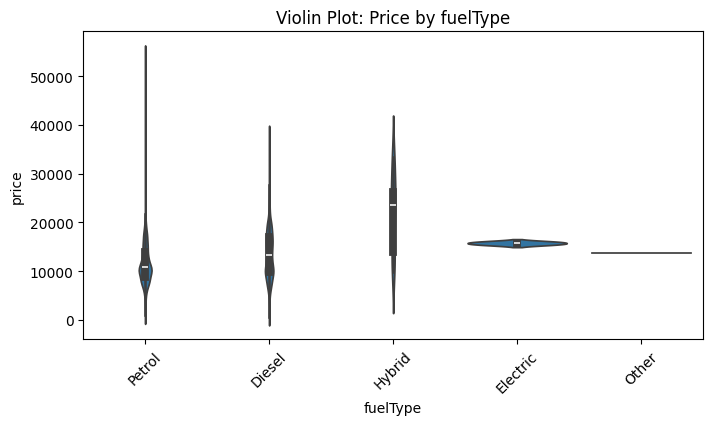

In [58]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=col, y='price', data=df)
    plt.title(f"Violin Plot: Price by {col}")
    plt.xticks(rotation=45)
    plt.show()


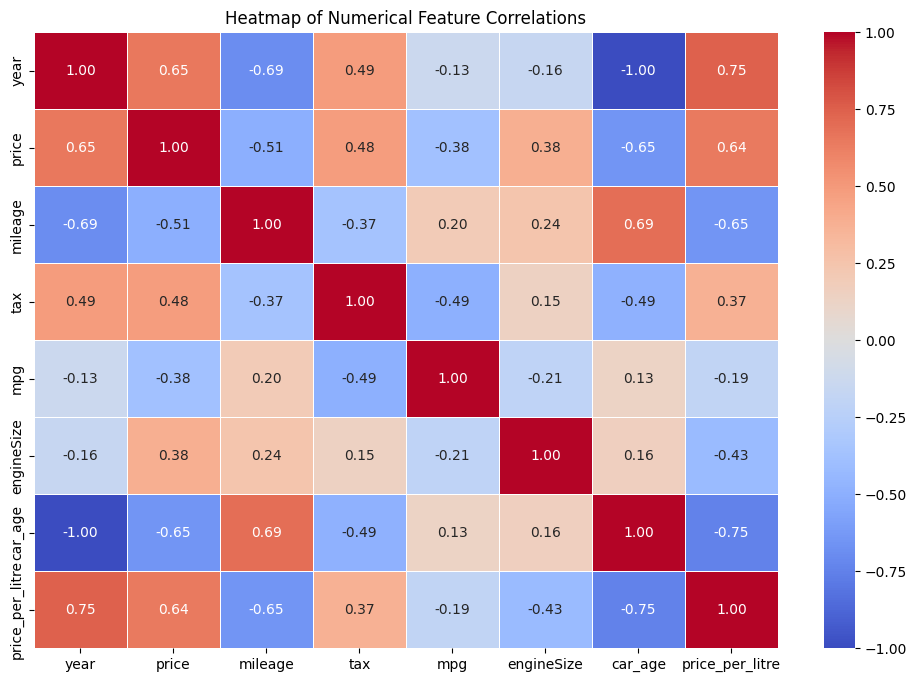

In [87]:
# ✅ Tallaabada 3.5: Heatmap of Numerical Features

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Feature Correlations")
plt.show()

# **3. Data Cleaning & Transformation**

In [59]:
# i. Check for missing values
missing = df.isnull().sum()
print("🔎 Missing values per column:")
print(missing[missing > 0])


🔎 Missing values per column:
Series([], dtype: int64)


In [60]:
# Check if 'model' exists first
if 'model' in df.columns:
    df.drop(columns=['model'], inplace=True)
    print("✅ 'model' column removed.")
else:
    print("ℹ️ 'model' column not found — possibly already removed.")


✅ 'model' column removed.


In [62]:
# Refresh column type lists after dropping 'model'
numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()


In [63]:
# ii. Handle missing values
from sklearn.impute import SimpleImputer

# Strategy:
# - Median for numerical (robust to outliers)
# - Most frequent for categorical

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
df[numerical_cols] = pd.DataFrame(num_imputer.fit_transform(df[numerical_cols]), columns=numerical_cols)
df[categorical_cols] = pd.DataFrame(cat_imputer.fit_transform(df[categorical_cols]), columns=categorical_cols)


In [64]:
# i. Check duplicates
duplicate_count = df.duplicated().sum()
print(f"🧾 Duplicate rows found: {duplicate_count}")

# ii. Remove duplicates
df.drop_duplicates(inplace=True)
print(f"✅ After removal: {df.shape[0]} rows")


🧾 Duplicate rows found: 155
✅ After removal: 17810 rows


In [65]:
# Example: Fix spelling, formatting, whitespace
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()
print("🛠️ Categorical values cleaned (whitespace, casing)")


🛠️ Categorical values cleaned (whitespace, casing)


# **Outlier Detection & Removal**

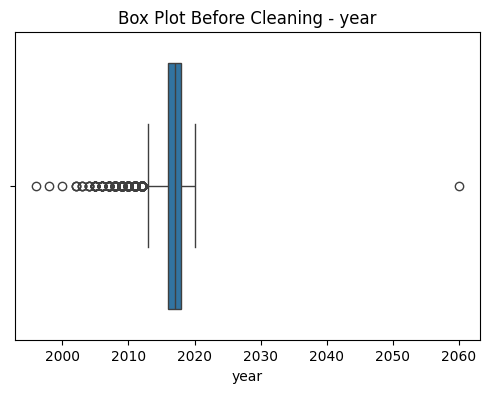

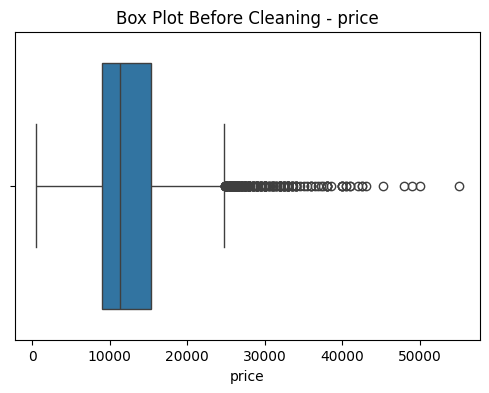

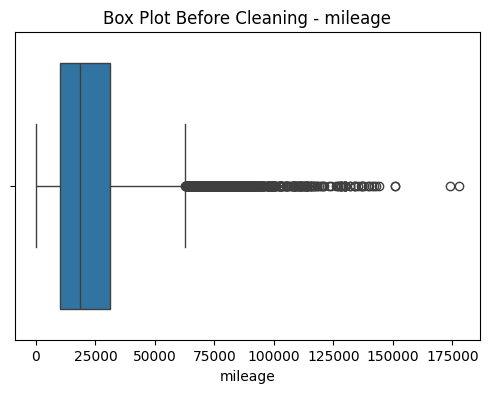

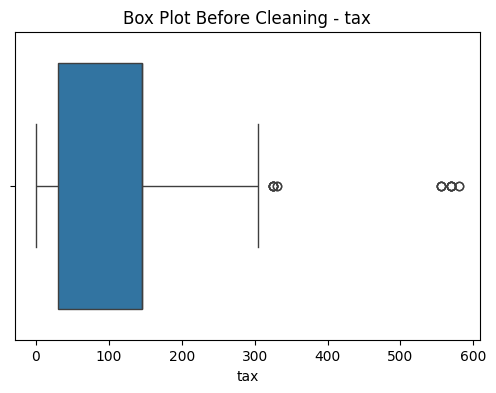

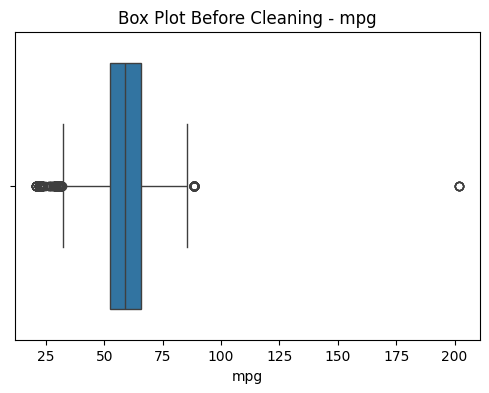

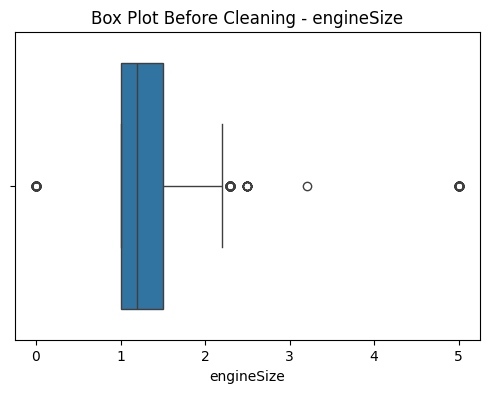

In [66]:
# i. Box plots before removing outliers
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot Before Cleaning - {col}")
    plt.show()


In [67]:
# ii. Handle outliers using Z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_cols]))
df = df[(z_scores < 3).all(axis=1)]
print(f"✅ After outlier removal: {df.shape[0]} rows")


✅ After outlier removal: 17101 rows


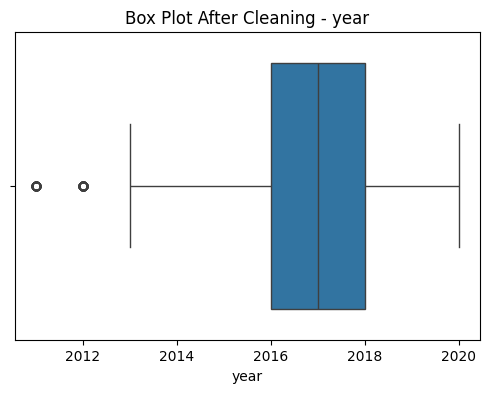

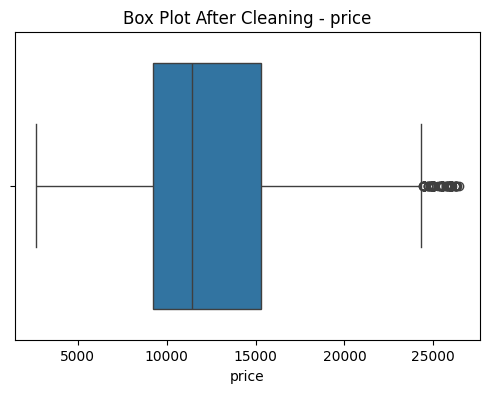

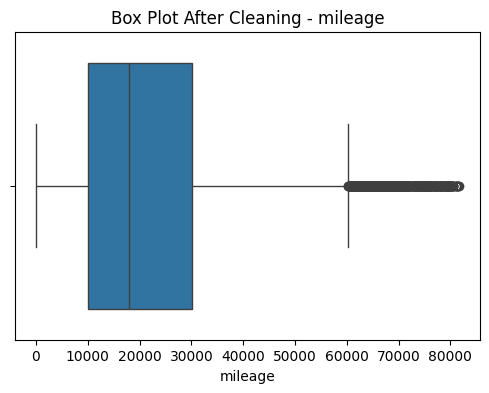

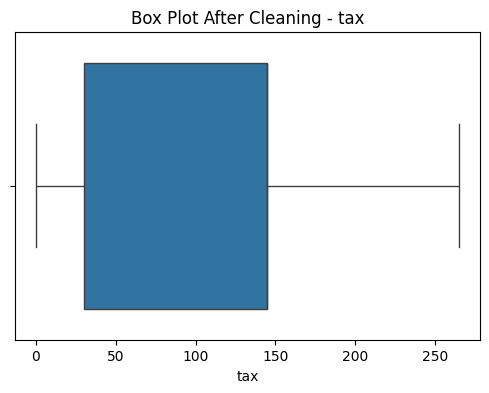

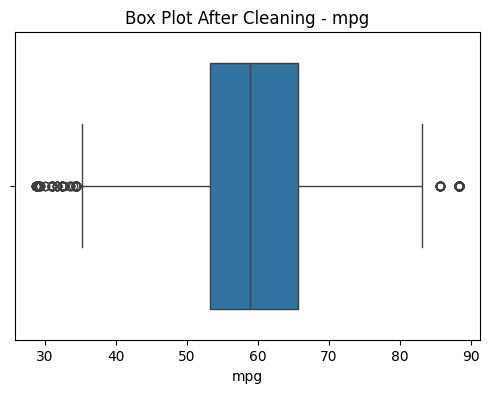

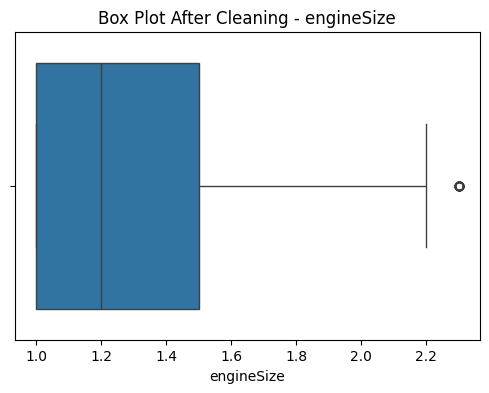

In [68]:
# iv. Box plots after outlier removal
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot After Cleaning - {col}")
    plt.show()


In [69]:
#Data Transformation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create copies
df_scaled_minmax = df.copy()
df_scaled_standard = df.copy()
df_log_transformed = df.copy()


In [70]:
# i. Min-Max Normalization
minmax_scaler = MinMaxScaler()
df_scaled_minmax[numerical_cols] = minmax_scaler.fit_transform(df_scaled_minmax[numerical_cols])
print("✅ Min-Max Scaling Done [0-1]")


✅ Min-Max Scaling Done [0-1]


In [71]:
# ii. Standardization (Z-score)
standard_scaler = StandardScaler()
df_scaled_standard[numerical_cols] = standard_scaler.fit_transform(df_scaled_standard[numerical_cols])
print("✅ Z-score Standardization Done")


✅ Z-score Standardization Done


In [72]:
# iii. Log Transformation
import numpy as np

for col in numerical_cols:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])
print("✅ Log transformation done (log1p)")


✅ Log transformation done (log1p)


# **Step 4: Feature Engineering**

In [75]:
# Example: Create car age if 'year' exists
from datetime import datetime

if 'year' in df.columns:
    current_year = datetime.now().year
    df['car_age'] = current_year - df['year']
    print("✅ Feature 'car_age' added.")

# Example: Create a feature for price per engine size (if both exist)
if 'price' in df.columns and 'engineSize' in df.columns:
    df['price_per_litre'] = df['price'] / df['engineSize']
    print("✅ Feature 'price_per_litre' added.")


✅ Feature 'car_age' added.
✅ Feature 'price_per_litre' added.


/tmp/ipython-input-1100638893.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_age'] = current_year - df['year']
/tmp/ipython-input-1100638893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_litre'] = df['price'] / df['engineSize']


In [76]:
# Convert and extract if any datetime-like columns exist
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_datetime(df[col])
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_weekday'] = df[col].dt.weekday
        print(f"✅ Extracted date parts from {col}")
    except:
        continue  # Not a real datetime column


/tmp/ipython-input-502071623.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
/tmp/ipython-input-502071623.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


# **Step 5: Feature Encoding**

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Refresh column types in case new ones were added in Feature Engineering
numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Setup column transformer with One-Hot Encoding for categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Fit and transform dataset (only if you want encoded version now)
df_encoded = preprocessor.fit_transform(df)

print("✅ One-Hot Encoding applied. Result is a NumPy array.")


✅ One-Hot Encoding applied. Result is a NumPy array.


d. Explanation of Encoding Method Used:
✅ We used One-Hot Encoding because:

Your categorical variables (like fuelType, transmission, etc.) are nominal — they have no intrinsic order.

One-Hot Encoding prevents the model from misunderstanding any ranking between categories.

It’s supported natively by most ML models (especially tree-based ones).

❌ We did not use:

Label Encoding, because it introduces artificial ordinal relationships between categories.

Ordinal Encoding, since none of your categorical features (e.g., fuelType) are naturally ordered.

# **Step 6: Feature Selection**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


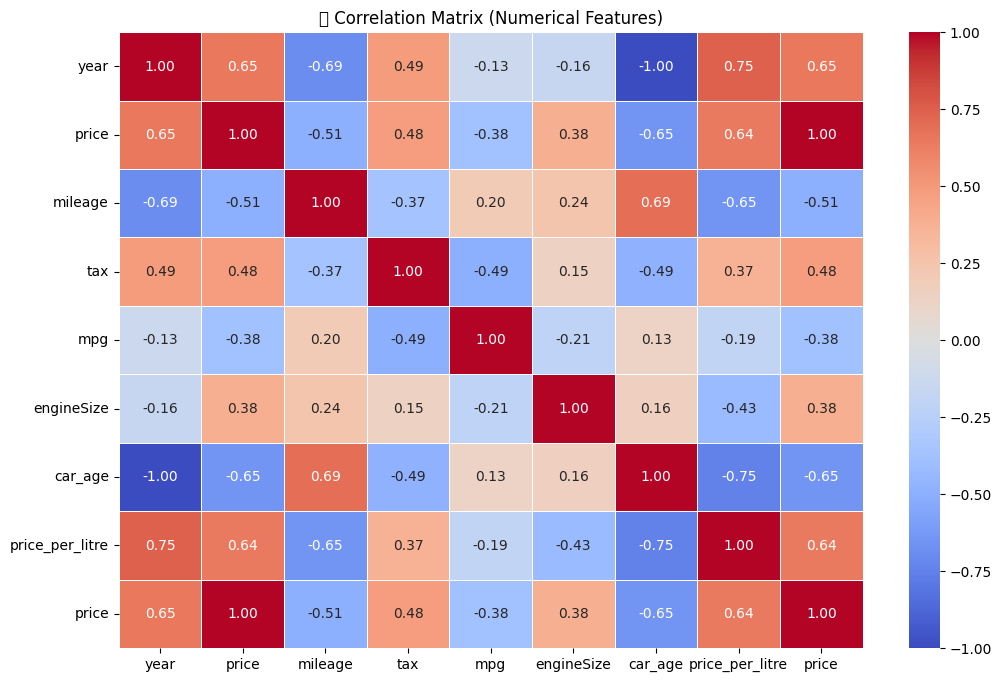

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric features
corr_matrix = df[numerical_cols + ['price']].corr()

# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Matrix (Numerical Features)")
plt.show()


In [80]:
# Keep only features with strong correlation (|corr| > 0.3 as a threshold)
important_features = corr_matrix['price'][abs(corr_matrix['price']) > 0.3].index.tolist()
important_features.remove('price')  # exclude target
print("✅ Selected important features:", important_features)


✅ Selected important features: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age', 'price_per_litre', 'price']


# **7. Constructing predictive features **

In [81]:
#Define Final Features and Target

# Assuming we're using the fully cleaned and feature-engineered DataFrame (e.g., df)

# Drop target column to create feature set
X = df.drop(columns=['price'])

# Define target variable
y = df['price']

print("✅ Features and target separated.")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


✅ Features and target separated.
X shape: (17101, 9)
y shape: (17101,)


In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Refresh column types in case anything changed
numerical_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [83]:
# Transform X using the preprocessor
X_transformed = preprocessor.fit_transform(X)

print("✅ Final feature matrix constructed (with encoded categorical features).")


✅ Final feature matrix constructed (with encoded categorical features).


In [84]:
# Feature names
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + encoded_cat_features.tolist()

print(f"Total number of features used: {len(all_features)}")


Total number of features used: 15


# **Step 8: Data Splitting & Baseline Model,**

In [85]:
from sklearn.model_selection import train_test_split

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

print(f"✅ Data split complete:")
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


✅ Data split complete:
Train set: (13680, 15), Test set: (3421, 15)


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_baseline)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
r2 = r2_score(y_test, y_pred_baseline)

print("📊 Baseline Model (Linear Regression) Results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Baseline Model (Linear Regression) Results:
MAE: 637.88
RMSE: 856.60
R² Score: 0.96


# **Baseline Model Prediction Review**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


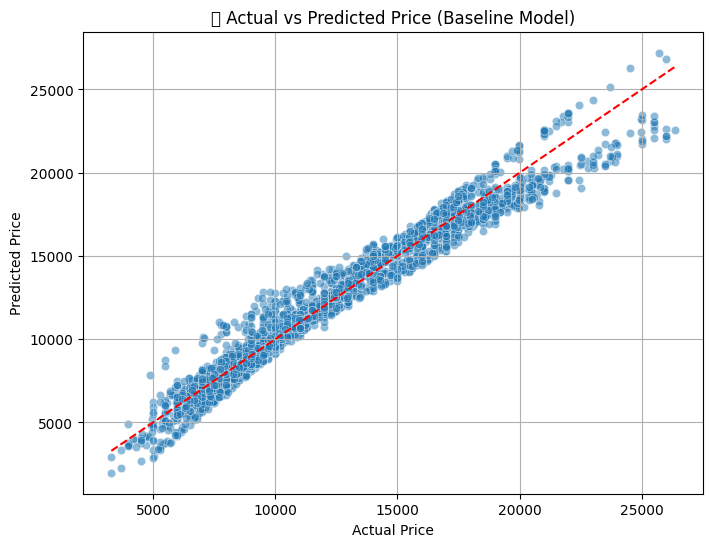

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_baseline, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("📍 Actual vs Predicted Price (Baseline Model)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


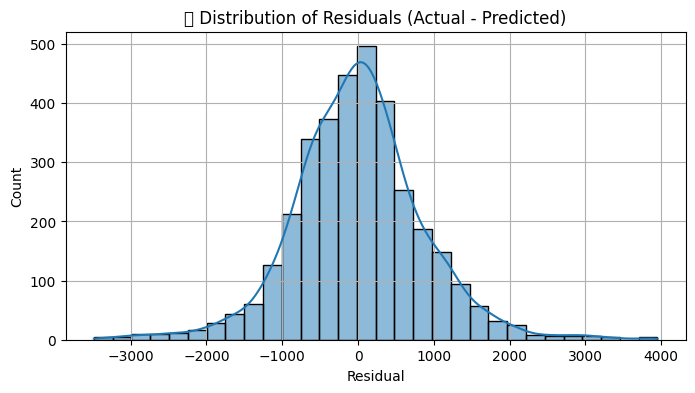

In [89]:
residuals = y_test - y_pred_baseline

plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("📉 Distribution of Residuals (Actual - Predicted)")
plt.xlabel("Residual")
plt.grid(True)
plt.show()


# **Step 9: Training Multiple ML Models**

# **1. Decision Tree Regressor**

In [92]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2 = r2_score(y_test, y_pred_dt)

print("🌳 Decision Tree Results:")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")


🌳 Decision Tree Results:
MAE: 8.33 | RMSE: 58.73 | R²: 1.00


# **RandomForestRegressor**

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Results:")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")


🌲 Random Forest Results:
MAE: 8.56 | RMSE: 52.79 | R²: 1.00


# **K-Nearest Neighbors (KNN)**

In [94]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2 = r2_score(y_test, y_pred_knn)

print("📍 KNN (k=5) Results:")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")


📍 KNN (k=5) Results:
MAE: 2302.17 | RMSE: 3194.40 | R²: 0.42


# **Gradient Boosting Regressor**

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_gb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2 = r2_score(y_test, y_pred_gb)

print("⚡ Gradient Boosting Results:")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")


⚡ Gradient Boosting Results:
MAE: 156.23 | RMSE: 227.65 | R²: 1.00


# **XGBoost Regressor**

In [96]:
# You may need to install: !pip install xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("🚀 XGBoost Results:")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")


🚀 XGBoost Results:
MAE: 49.92 | RMSE: 144.73 | R²: 1.00


In [ ]:
!pip install catboost

In [104]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# Add to results
results = evaluate_model("CatBoost Regressor", y_test, y_pred_cat, results)



📊 Final Model Performance Summary:


,Model,MAE,RMSE,R²
1,Decision Tree,8.33,58.73,1.00
2,Random Forest,8.56,52.79,1.00
4,Gradient Boosting,156.23,227.65,1.00
6,CatBoost Regressor,51.70,140.62,1.00
5,XGBoost,49.92,144.73,1.00
0,Linear Regression,637.88,856.60,0.96
3,KNN (k=5),2302.17,3194.40,0.42


📊 Final Model Performance Summary:


,Model,MAE,RMSE,R²
1,Decision Tree,8.33,58.73,1.00
2,Random Forest,8.56,52.79,1.00
4,Gradient Boosting,156.23,227.65,1.00
6,CatBoost Regressor,51.70,140.62,1.00
5,XGBoost,49.92,144.73,1.00
0,Linear Regression,637.88,856.60,0.96
3,KNN (k=5),2302.17,3194.40,0.42


/tmp/ipython-input-2819639335.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")
/tmp/ipython-input-2819639335.py:92: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


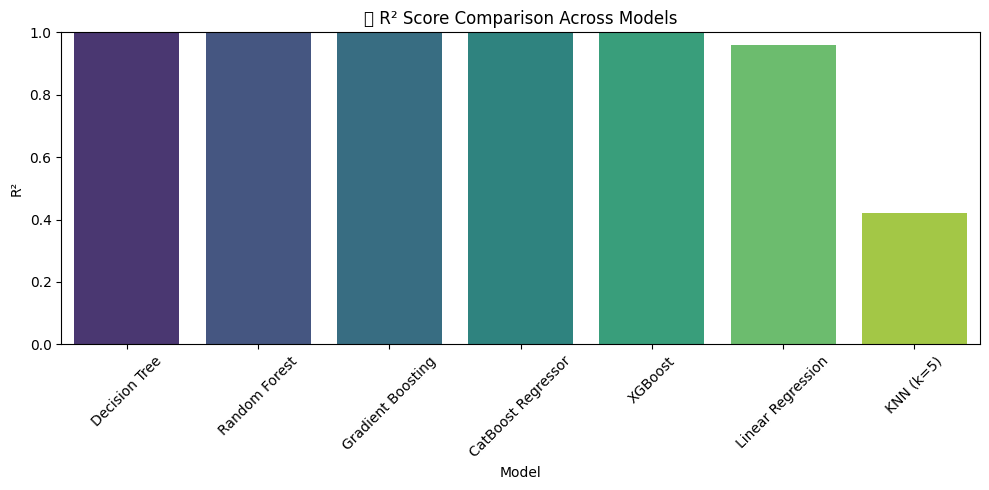

/tmp/ipython-input-2819639335.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")
/tmp/ipython-input-2819639335.py:102: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


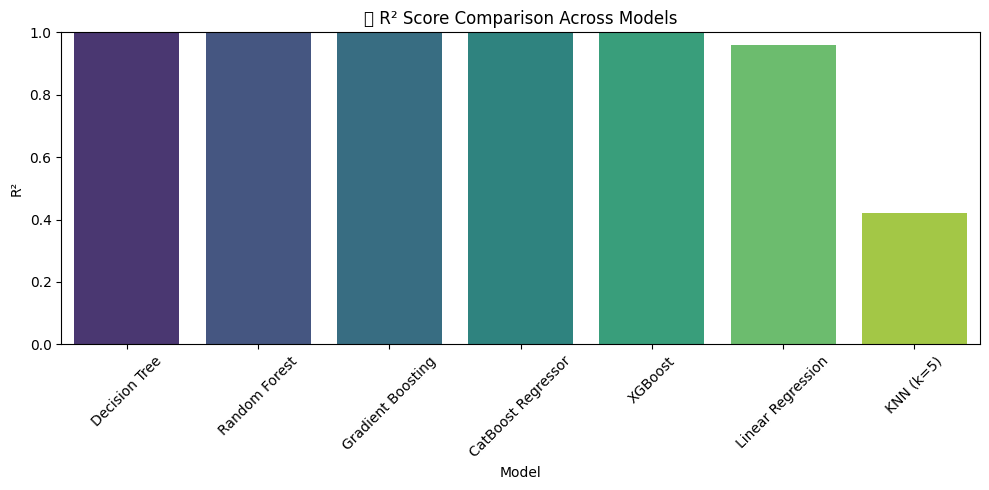

In [110]:
# 📌 Summarize All Model Results in a Table

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 🧮 Helper function to evaluate models
def evaluate_model(name, y_true, y_pred, results):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 2)
    })

# 🔰 Initialize result list
results = []

# Evaluate all trained models (add only if they were trained)
evaluate_model("Linear Regression", y_test, y_pred_baseline, results)
evaluate_model("Decision Tree", y_test, y_pred_dt, results)
evaluate_model("Random Forest", y_test, y_pred_rf, results)
evaluate_model("KNN (k=5)", y_test, y_pred_knn, results)
evaluate_model("Gradient Boosting", y_test, y_pred_gb, results)
evaluate_model("XGBoost", y_test, y_pred_xgb, results)
evaluate_model("CatBoost Regressor", y_test, y_pred_cat, results)


# 📊 Convert to DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R²", ascending=False)

print("📊 Final Model Performance Summary:")
display(results_df)
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 🧮 Helper function to evaluate models
def evaluate_model(name, y_true, y_pred, results):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 2)
    })

# 🔰 Initialize result list
results = []

# Evaluate all trained models (only include if trained)
evaluate_model("Linear Regression", y_test, y_pred_baseline, results)
evaluate_model("Decision Tree", y_test, y_pred_dt, results)
evaluate_model("Random Forest", y_test, y_pred_rf, results)
evaluate_model("KNN (k=5)", y_test, y_pred_knn, results)
evaluate_model("Gradient Boosting", y_test, y_pred_gb, results)

# Optional models (include only if available)
try:
    evaluate_model("XGBoost", y_test, y_pred_xgb, results)
except:
    pass

try:
    evaluate_model("CatBoost Regressor", y_test, y_pred_cat, results)
except:
    pass

# 📊 Convert to DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R²", ascending=False)

print("📊 Final Model Performance Summary:")
display(results_df)

# 📉 Optional: Visual Bar Chart of R² Scores
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")
plt.title("📈 R² Score Comparison Across Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# Optional: Visual Bar Chart of R² Scores
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")
plt.title("📈 R² Score Comparison Across Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# **Step 10: Hyperparameter Tuning & Final Model Selection**

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define grid
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_grid, cv=3, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Evaluate best model
best_rf = rf_grid_search.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

print("✅ Best Random Forest Params:", rf_grid_search.best_params_)
evaluate_model("Random Forest (Tuned)", y_test, y_pred_rf_best, results)


✅ Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [112]:
gb_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb, gb_grid, cv=3, scoring='r2', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

best_gb = gb_grid_search.best_estimator_
y_pred_gb_best = best_gb.predict(X_test)

print("✅ Best Gradient Boosting Params:", gb_grid_search.best_params_)
evaluate_model("Gradient Boosting (Tuned)", y_test, y_pred_gb_best, results)


✅ Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [113]:
from sklearn.tree import DecisionTreeRegressor

dt_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(dt, dt_grid, cv=3, scoring='r2', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best model
best_dt = dt_grid_search.best_estimator_
y_pred_dt_best = best_dt.predict(X_test)

print("✅ Best Decision Tree Params:", dt_grid_search.best_params_)
evaluate_model("Decision Tree (Tuned)", y_test, y_pred_dt_best, results)


✅ Best Decision Tree Params: {'max_depth': None, 'min_samples_split': 5}


📊 Final Model Comparison (After Tuning):


,Model,MAE,RMSE,R²
1,Decision Tree,8.33,58.73,1.00
2,Random Forest,8.56,52.79,1.00
8,Gradient Boosting (Tuned),43.31,76.74,1.00
4,Gradient Boosting,156.23,227.65,1.00
5,XGBoost,49.92,144.73,1.00
6,CatBoost Regressor,51.70,140.62,1.00
9,Decision Tree (Tuned),9.07,60.46,1.00
7,Random Forest (Tuned),8.59,54.77,1.00
0,Linear Regression,637.88,856.60,0.96
3,KNN (k=5),2302.17,3194.40,0.42


/tmp/ipython-input-2166290040.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette="magma")
/tmp/ipython-input-2166290040.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


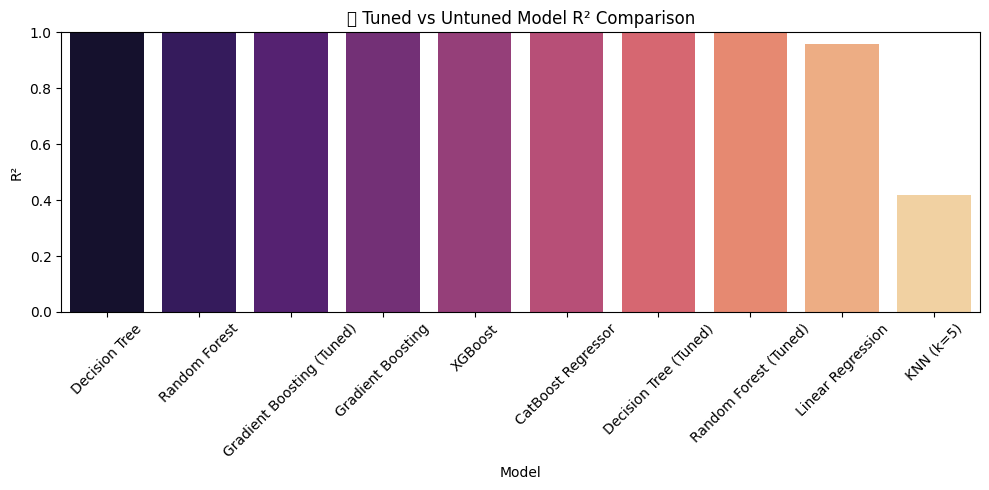

In [114]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R²", ascending=False)

print("📊 Final Model Comparison (After Tuning):")
display(results_df)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R²", palette="magma")
plt.title("📈 Tuned vs Untuned Model R² Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# **Save and Export the Best Model**

In [115]:
# Find the best model by R² score
best_model_name = results_df.iloc[0]["Model"]
print(f"🏆 Best model based on R²: {best_model_name}")


🏆 Best model based on R²: Decision Tree


In [116]:
# Map model names to their trained objects
model_dict = {
    "Linear Regression": baseline_model,
    "Decision Tree": dt_model,
    "Decision Tree (Tuned)": best_dt,
    "Random Forest": rf_model,
    "Random Forest (Tuned)": best_rf,
    "Gradient Boosting": gb_model,
    "Gradient Boosting (Tuned)": best_gb,
    "XGBoost": xgb_model if 'xgb_model' in globals() else None,
    "CatBoost Regressor": cat_model if 'cat_model' in globals() else None
}

# Select the best model object
final_model = model_dict.get(best_model_name)

if final_model is None:
    print("⚠️ Model object not found. Please check name.")


In [117]:
import joblib

# Save the model
joblib.dump(final_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"💾 Model saved as {best_model_name.replace(' ', '_').lower()}_model.pkl")


💾 Model saved as decision_tree_model.pkl
